# Can we predict if the server will be hacked?

### This notebook goes through a basic exploratory data analysis of the dataset with Python


In [4]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### Loading in the data

After we've downloaded the data, we need to get it into the notebook.

I've stored my downloaded data in a file called `Dataset`.

In [5]:
# Import train & test data 
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')


In [6]:
# View the training data
train.head(15)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1
5,CR_96263,07-APR-03,0,45,45,10,3,1,0,1,6,1,303,1.0,72,62,34,1
6,CR_131400,22-JAN-08,0,30,35,7,3,7,1,0,5,1,174,0.0,112,29,43,1
7,CR_11981,14-MAY-93,0,8,7,7,3,9,8,0,5,1,316,1.0,72,62,34,1
8,CR_184134,21-AUG-16,0,49,49,6,5,8,3,1,1,1,316,1.0,103,14,34,1
9,CR_32634,25-AUG-96,1,4,4,6,5,15,10,0,5,2,145,1.0,103,29,34,0


In [7]:
# View the training data columns
train.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [8]:
# View the training data shape
train.shape

(23856, 18)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [10]:
# View the test data (same columns as the training data)
test.head() # head = view first 5 lines

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


## Data Descriptions
**Incident ID :** Unique Identifier for an Incident Log

**Date :** Date WOF incident occurence

**X_1 - X_15 :** Anonymized Logging parameter

**Multiple_offence :** [Target] Indicates that if an incident was hack [1: Yes , 0: No]

In [11]:
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


## What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

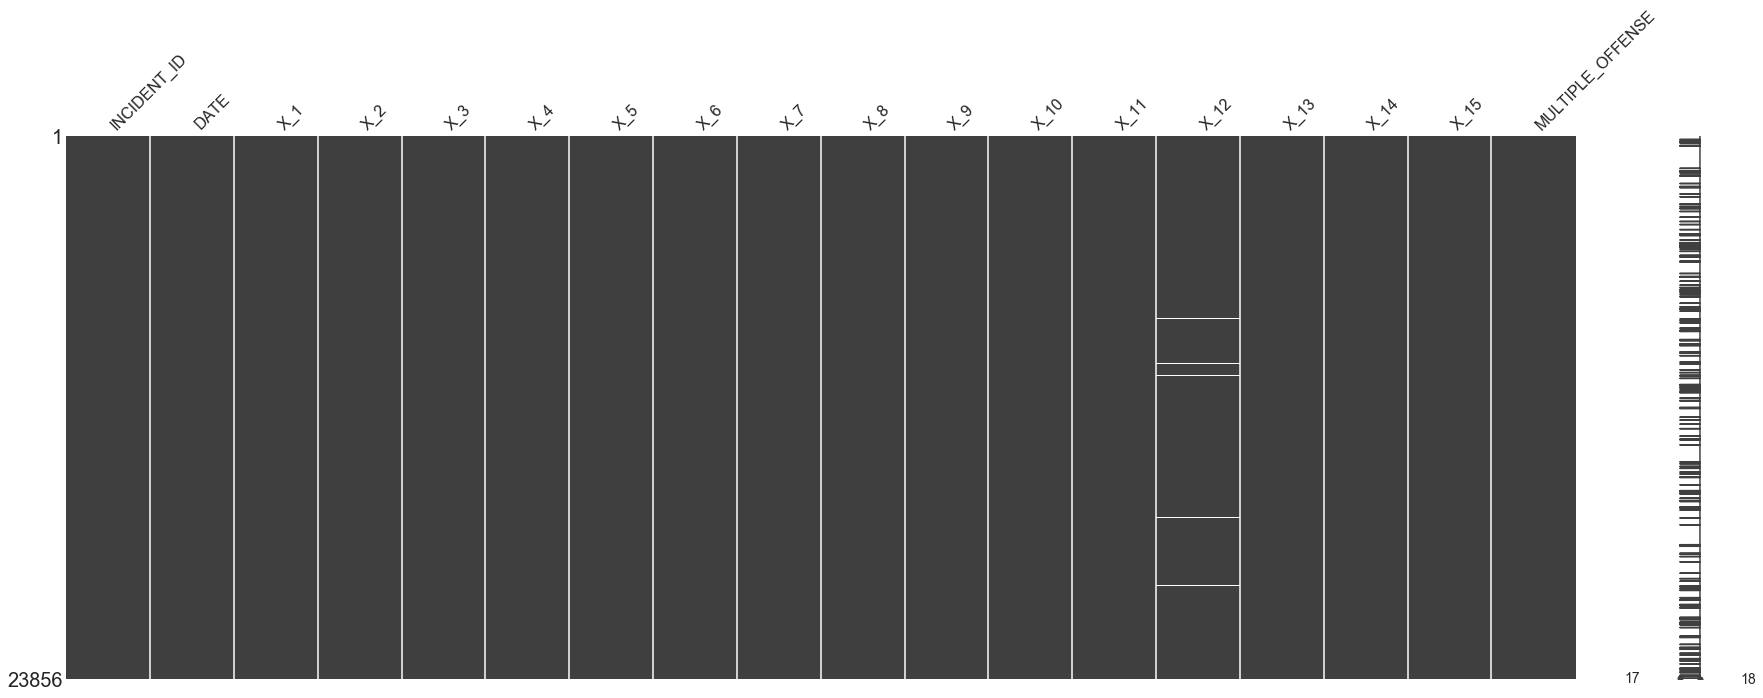

In [12]:
# Plot graphic of missing values for train data
missingno.matrix(train, figsize = (30,10))

Ok we can clearly see some missing values here in X_12 cabin column.

It's important to visualise missing values early so you know where the major holes are in your dataset.

Knowing this informaiton will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [13]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [14]:
total_train = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_2], axis=1, keys=['Total', '%'])
missing_data_train.head(5)

,Total,%
X_12,182,0.8
MULTIPLE_OFFENSE,0,0.0
X_6,0,0.0
DATE,0,0.0
X_1,0,0.0


Similarly i checked for missing data in test data

In [15]:
test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

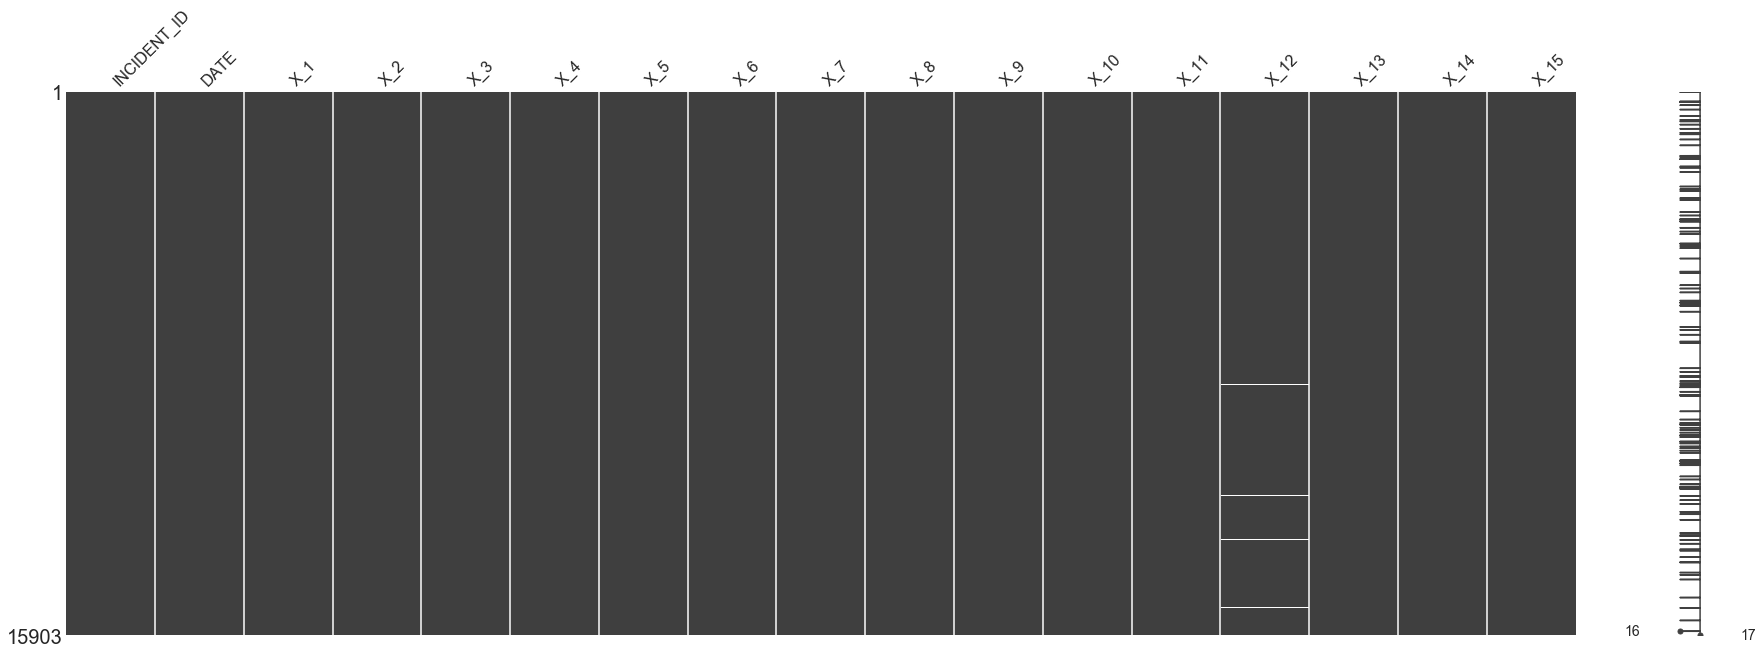

In [16]:
# Plot graphic of missing values
missingno.matrix(test, figsize = (30,10))

## To perform our data analysis, let's create two new dataframes which are a copy of original dataset

In [17]:
df_train = train.copy()

In [18]:
df_test= test.copy()

## What datatypes are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind. 

In [19]:
# Different data types in the dataset
df_train.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

## Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models.
Some may need more preprocessing than others to get ready.

In [20]:
df_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


### Target Feature: MULTIPLE_OFFENSE

Description:  [Target] Indicates that if an incident was hack [1: Yes , 0: No]
    
This is the variable we want our machine learning model to predict based off all the others.

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64


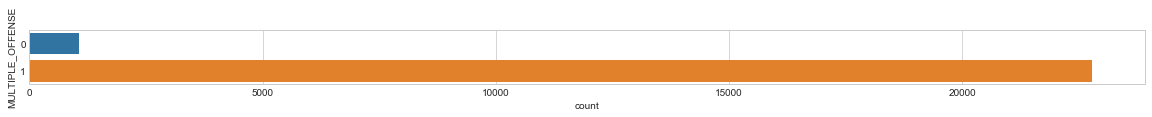

In [21]:
# If the incident was hacked?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='MULTIPLE_OFFENSE', data=df_train);
print(df_train.MULTIPLE_OFFENSE.value_counts())

## Changing Incident ID to int

In [22]:
df_train.INCIDENT_ID.head()

0    CR_102659
1    CR_189752
2    CR_184637
3    CR_139071
4    CR_109335
Name: INCIDENT_ID, dtype: object

In [23]:
df_train['INCIDENT_ID'] = df_train.apply(lambda x: x['INCIDENT_ID'][3:], axis = 1)

In [24]:
df_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [25]:
df_train['INCIDENT_ID']=df_train['INCIDENT_ID'].astype(int)

In [26]:
df_test['INCIDENT_ID'] = df_test.apply(lambda x: x['INCIDENT_ID'][3:], axis = 1)

In [27]:
df_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [28]:
df_test['INCIDENT_ID']= df_test['INCIDENT_ID'].astype(int)

### DATE

Converting date column to an pandas datetime object

In [29]:
df_train["DATE"] = pd.to_datetime(df_train["DATE"] )

In [30]:
df_train.DATE.head()

0   2004-07-04
1   2017-07-18
2   2017-03-15
3   2009-02-13
4   2005-04-13
Name: DATE, dtype: datetime64[ns]

In [31]:
df_train['year'] = df_train['DATE'].dt.year
df_train['month'] = df_train['DATE'].dt.month
df_train['day'] = df_train['DATE'].dt.day

df_train["dayofyear"] = df_train['DATE'].dt.dayofyear
df_train["week"]= df_train['DATE'].dt.week
df_train["weekofyear"] = df_train['DATE'].dt.weekofyear
df_train["dayofweek"] = df_train['DATE'].dt.dayofweek
df_train["weekday"] = df_train['DATE'].dt.weekday

In [32]:
df_train = df_train.drop('DATE',axis=1)

In [33]:
df_test["DATE"] = pd.to_datetime(df_test["DATE"] )

In [34]:
df_test['year'] = df_test['DATE'].dt.year
df_test['month'] = df_test['DATE'].dt.month
df_test['day'] = df_test['DATE'].dt.day
df_test['dayofyear'] = df_test['DATE'].dt.dayofyear
df_test['week']= df_test['DATE'].dt.week
df_test["weekofyear"] = df_test['DATE'].dt.weekofyear
df_test["dayofweek"] = df_test['DATE'].dt.dayofweek
df_test["weekday"] = df_test['DATE'].dt.weekday

In [35]:
df_test = df_test.drop('DATE',axis=1)

### Handling X_12 missing data 

In [36]:
df_train.X_12.isnull().sum()

182

In [37]:
df_train.X_12.value_counts()

1.0     15674
0.0      5171
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
8.0         9
10.0        7
9.0         6
7.0         4
11.0        4
15.0        2
20.0        2
17.0        1
58.0        1
50.0        1
40.0        1
16.0        1
90.0        1
12.0        1
30.0        1
14.0        1
Name: X_12, dtype: int64

In [38]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["X_12"].mean()
    std = df_test["X_12"].std()
    is_null = dataset["X_12"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["X_12"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["X_12"] = age_slice
    dataset["X_12"] = dataset["X_12"].astype(int)
    
df_train["X_12"].isnull().sum()

0

In [39]:
df_test["X_12"].isnull().sum()

0

## Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

### Let's seperate the data

In [40]:
# Split the dataframe into data and labels
X_train = df_train.drop('MULTIPLE_OFFENSE', axis=1) # data
y_train = df_train.MULTIPLE_OFFENSE # labels
X_test = df_test

In [41]:
# Shape of the data (without labels)
X_train.shape

(23856, 24)

In [42]:
# Shape of the labels
y_train.shape

(23856,)

In [43]:
# Shape of the test data
X_test.shape

(15903, 24)

In [44]:
X_train.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_14,X_15,year,month,day,dayofyear,week,weekofyear,dayofweek,weekday
0,102659,0,36,34,2,1,5,6,1,6,...,29,36,2004,7,4,186,27,27,6,6
1,189752,1,37,37,0,0,11,17,1,6,...,142,34,2017,7,18,199,29,29,1,1
2,184637,0,3,2,3,5,1,0,2,3,...,93,34,2017,3,15,74,11,11,2,2
3,139071,0,33,32,2,1,7,1,1,6,...,29,34,2009,2,13,44,7,7,4,4
4,109335,0,33,32,2,1,8,3,0,5,...,29,43,2005,4,13,103,15,15,2,2


### Importing all the Classification algorithms

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import model_selection, tree, preprocessing, metrics, linear_model

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

### Building the Pipeline

The first step in building the pipeline is to define each transformer type. The convention here is generally to create transformers for the different variable types. In the code below I have created a numeric transformer which applies a StandardScaler, and includes a SimpleImputer to fill in any missing values.

We are building a basic pipeline with two steps,

* Normalize numerical features with StandardScaler()
* Run the Classifier


Trying out the following classification algorithms

* Logistic Regression
* Stochastic Gradient Descent Classifier
* Support Vector Machines - rbf
* K-nearest Classifier
* Decision Tree Classifier
* Random Forest Classifier
* Gradient Boosting Classifier
* Gaussian Naive Bayes

In [46]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledSGD', Pipeline([('Scaler', StandardScaler()),('SGD', SGDClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC(kernel="rbf", C=0.025, probability=True))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_neighbors=3))])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledGNB', Pipeline([('Scaler', StandardScaler()),('GNB', GaussianNB())])))



results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.043805 (0.004487)
ScaledSGD: -0.044853 (0.003675)
ScaledSVC: -0.044769 (0.003850)
ScaledKNN: -0.044391 (0.004148)
ScaledDT: -0.001760 (0.000855)
ScaledRF: -0.011025 (0.001779)
ScaledGBM: -0.001174 (0.000644)
ScaledGNB: -0.054200 (0.005624)


From the output above, it looks like the Gradient Boosting Classifier operforms the best using a scaled version of the data. From this point onward, I will build the regression algorithm using the Gradient Boosting Classifier. The GBM will be tested with a few n_estimators using the GridSearchCV function.

In [47]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = { 
            "n_estimators"      : [100,200,300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            }
model =GradientBoostingClassifier(random_state=42)
kfold =KFold(n_splits=10, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.001174 (0.000644) with: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
-0.000587 (0.000599) with: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}
-0.000335 (0.000451) with: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300}
-0.001174 (0.000644) with: {'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100}
-0.000587 (0.000599) with: {'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 200}
-0.000335 (0.000451) with: {'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 300}
-0.001174 (0.000644) with: {'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}
-0.000587 (0.000599) with: {'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 200}
-0.000335 (0.000451) with: {'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 300}
-0.013875 (0.001908) with: {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
-0.007587 (0.002024) with: {'m

In [48]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.000335 using {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300}


The best n_estimator configuration is 300 with the negative mean square error closest to 0.

In [49]:
grid_result.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Finalise and validate model

There's a need to standardise the training and test data before putting them through the GBR model.

In [50]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

fin_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

fin_model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = fin_model.predict(rescaled_X_test)

In [51]:
# Our predictions array
predictions[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Submission

In [52]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['INCIDENT_ID']=test['INCIDENT_ID']
submission['MULTIPLE_OFFENSE'] = predictions # our model predictions on the test dataset
submission.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [53]:
# Convert submisison dataframe to csv for submission to csv 
# for HackerEarth submisison
submission.to_csv('../gbc_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [54]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../gbc_submission.csv")
submissions_check.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


## Feature Importance

Which features of the best model were most important for making predictions?

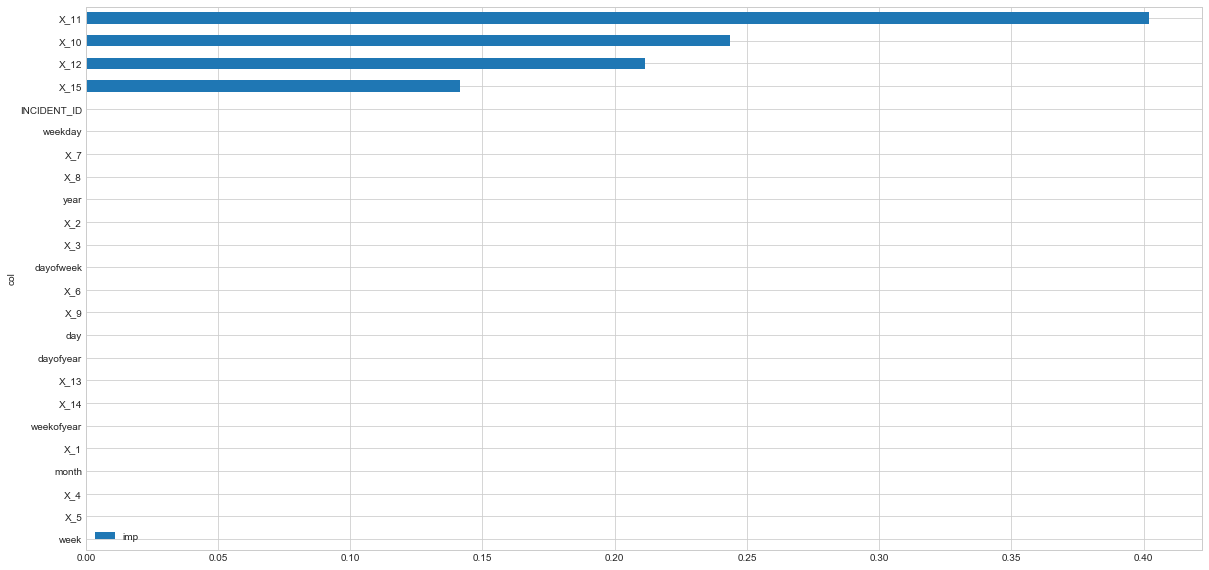

In [57]:
#Feature Importance
def feature_importance(model, data):
    
    fea_imp = pd.DataFrame({'imp': fin_model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True,False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

# Plot the feature importance scores
feature_importances = feature_importance(model, X_train)

#### Why would you want feature importance?

Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

In [59]:
feature_importances = feature_importances.sort_values(['imp'],ascending=False)

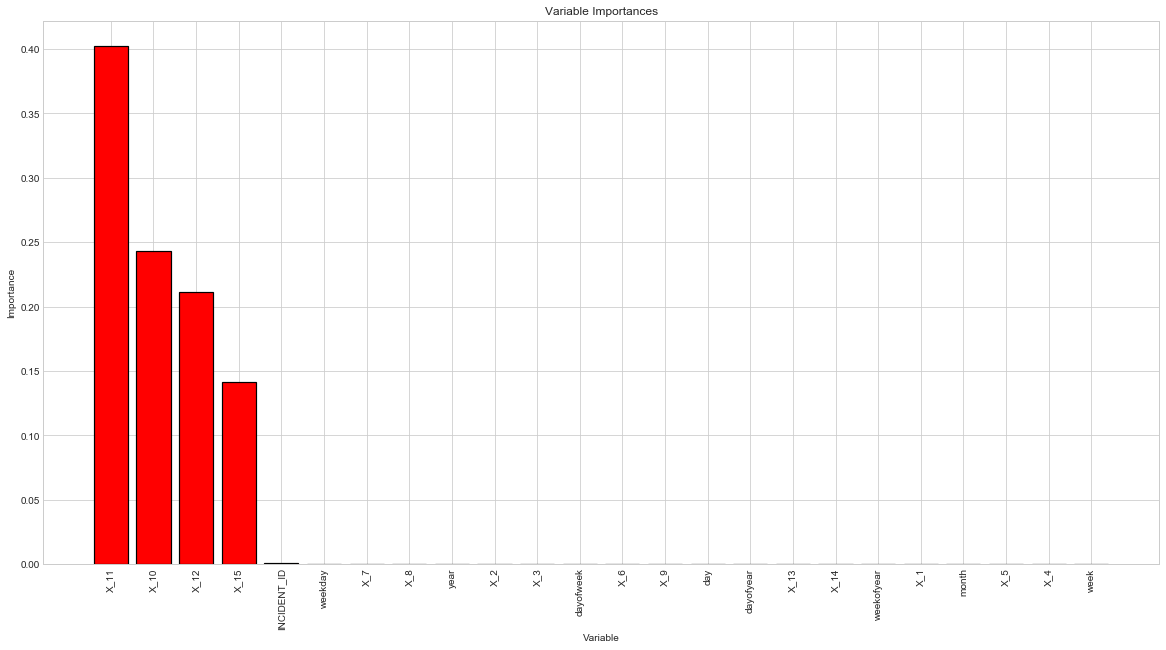

In [60]:
# list of x locations for plotting
x_values = list(range(len(feature_importances.imp)))# Make a bar chart
fig = plt.figure(figsize=(20,10))
plt.bar(x_values, feature_importances.imp, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)# Tick labels for x axis
plt.xticks(x_values, feature_importances.col, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Making a cumulative importance graph that shows the contribution to the overall importance of each additional variable. The dashed line is drawn at 90% of total importance accounted for.

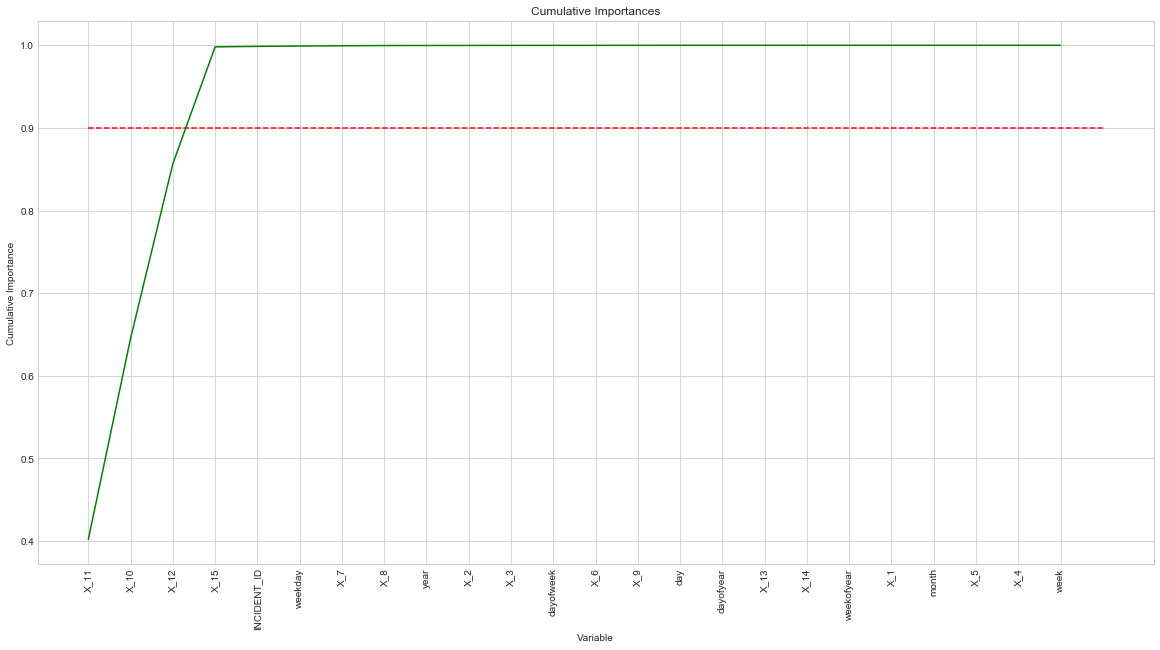

In [61]:
# List of features sorted from most to least important

sorted_importances = [importance for importance in feature_importances.imp]

sorted_features = [importance for importance in feature_importances.col]# Cumulative importances


cumulative_importances = np.cumsum(sorted_importances)# Make a line graph
fig = plt.figure(figsize=(20,10))
plt.plot(x_values, cumulative_importances, 'g-')# Draw line at 90% of importance retained

plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')# Format x ticks and labels

plt.xticks(x_values, sorted_features, rotation = 'vertical')# Axis labels and title

plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

We now use this to remove unimportant features. 90% is an arbitrary threshold, but if it leads to noticeably poor performance we can adjust the value. First, we need to find the exact number of features to exceed 90% importance:

In [62]:
# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 4


We then create a new training and testing set retaining only the 4 most important features.

In [63]:
# Extract the names of the most important features
important_feature_names = [feature for feature in feature_importances.col[:4]]


important_train_features = X_train[important_feature_names]
important_test_features = X_test[important_feature_names]# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (23856, 4)
Important test features shape: (15903, 4)


In [64]:
# Train the expanded model on only the important features
fin_model.fit(important_train_features, y_train)
# Make predictions on test data
final_predictions = fin_model.predict(important_test_features)

In [65]:
# Our predictions array
final_predictions[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [66]:
# Create a submisison dataframe and append the relevant columns
final_submission = pd.DataFrame()
final_submission['INCIDENT_ID']=test['INCIDENT_ID']
final_submission['MULTIPLE_OFFENSE'] = final_predictions # our model predictions on the test dataset
final_submission.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [67]:
# Convert submisison dataframe to csv for submission to csv 
# for HackerEarth submisison
final_submission.to_csv('../final_gbc_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
